Model development and residual calculation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
df = pd.read_csv("FuelConsumption.csv")
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
y = df[['CO2EMISSIONS']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
model=LinearRegression()
model.fit(X_train,y_train)
LinearRegression()
y_pred=model.predict(X_test)
residual =y_test-y_pred

Variable correlation

In [ ]:
import matplotlib.pyplot as plot
df.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS')
df.plot.scatter(x='CYLINDERS', y='CO2EMISSIONS')
df.plot.scatter(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS')

Multi-colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

vif=[]
for i in range (X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train, i))
pd.DataFrame({'vif':vif}, index=X.columns[0:3]).T
print('VIF of [ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG]:', vif)
sns.heatmap(X.iloc[:,0:3].corr(),annot=True)

Noramlity of residuals

In [ ]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plot

p = sns.distplot(residual,kde=True)
plot.xlabel('X')
sm.qqplot(df['CO2EMISSIONS'], line='s')
shapiro(residual)
# kstest(residual, "norm") # KS test good for sample number>2000

Heteroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import matplotlib.pyplot as plot
import statsmodels.api as sm

plot.scatter(y_pred,residual)
plot.xlabel('y_pred')
plot.ylabel('Residual')
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_test)
print ('Goldfeld-Quandt:', lzip(name, test))
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
white_test = sm.stats.diagnostic.het_white(results.resid, results.model.exog)
print("White test statistic:", white_test[0])
print("White test p-value:", white_test[1])

Autocorrelation

ljungbox stat:       lb_stat  lb_pvalue
40  37.739576   0.572471
Durbin-Watson stat: [2.2469908]
The residuals are not correlated.


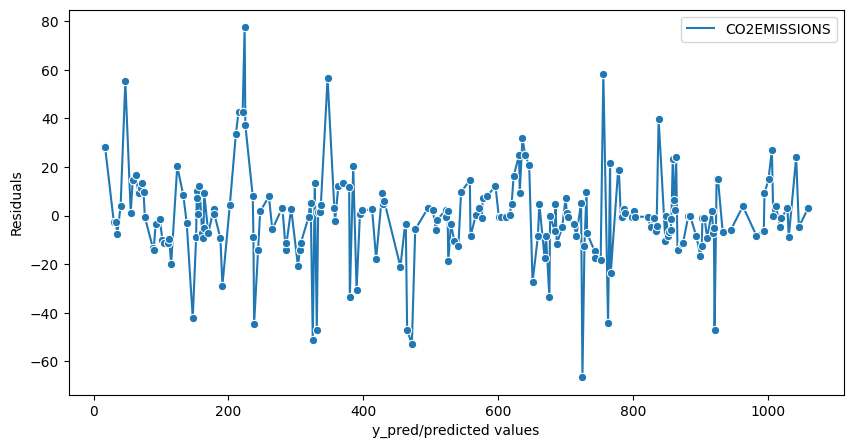

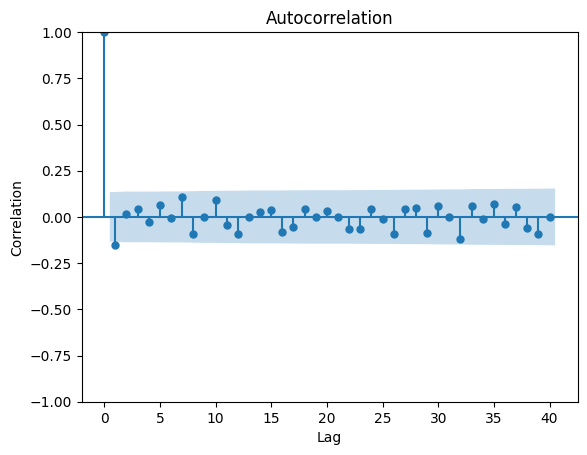

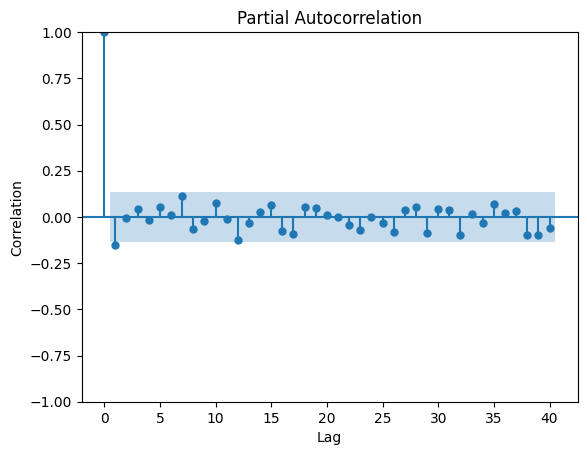

In [45]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import matplotlib.pyplot as plot

plot.figure(figsize=(10,5))
p = sns.lineplot(residual,marker='o',color='blue')
plot.xlabel('y_pred/predicted values')
plot.ylabel('Residuals')
print('ljungbox stat:', sm.stats.acorr_ljungbox(residual, lags=[40], return_df=True))
dw_statistic = durbin_watson(residual)
print('Durbin-Watson stat:',dw_statistic)
if dw_statistic < 1.5:
    print("The residuals are negatively correlated.")
elif dw_statistic > 2.5:
    print("The residuals are positively correlated.")
else:
    print("The residuals are not correlated.")
sm.graphics.tsa.plot_acf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()
sm.graphics.tsa.plot_pacf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()